# STOCK MARKET ANALYSIS PROJECT - 3

## Business Objective:
Predict the Reliance Industries Stock Price for the next 30 days.There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for Reliance Industries stock.

1. Split the last year into a test set- to build a model to predict stock price.
2. Find short term, & long term trends.
3. Understand how it is impacted from external factors or any big external events.
4. Forecast for next 30 days.

## `Abstract :` 
This project focuses on techniques and tools for handling Time Series Datasets for Fore-Casting. Main aim of this project is to make Stock Market Prediction and Forecasting using Stacked LSTM as we need to find short term and long term trends.

For solving this problem we are using Univariate Time Series Analysis : Univariate time series model here means that there are only one dependent variable on the time series model.


## `STEPS : `

1) Importing Libraries and Loading data

2) Cleaning data and sorting data by date.

3) Applying univariate approch by selecting `Closing Price` as target variables.

4) Exploration and Analysis of Datasets.

5) Preprocessing by MinMax Scaler.

6) Preparing train and test datasets.

7) Constructing Stacked LSTM model.

8) Evaluation of Model.

9) Forecasting for future 30 days.


### `Step-1:`  Importing Libraries and Loading data.

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import numpy as np
import seaborn as sns

In [2]:
# Loading dataset

import datetime as dt
import yfinance as yf

company = 'RELIANCE.NS'

# Define a start date and End Date
start = dt.datetime(2015,1,1)
end =  dt.datetime(2022,12,31)

# Read Stock Price Data 
df = yf.download(company, start , end)
df

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   438.988831   441.812073   437.676270   439.781311   417.988983   
2015-01-02   439.880371   443.818054   437.998199   438.617340   416.882568   
2015-01-05   438.344940   441.267212   432.946106   433.812897   412.316284   
2015-01-06   430.915344   432.401276   412.093750   414.124512   393.603485   
2015-01-07   414.619812   425.367950   414.570282   423.139069   402.171356   
...                 ...          ...          ...          ...          ...   
2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049  2524.050049   
2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951  2544.699951   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049  2543.300049   
2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951  2547.199951   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421  
...             ...  
2022-12-26  2764496  
2022-12-27  2659749  
2022-12-28  3442509  
2022-12-29  3198493  
2022-12-30  3364092  

[1976 rows x 6 columns]

### `Step-2:`  Cleaning data and sorting data by date.

In [3]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988983   
2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882568   
2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316284   
2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171356   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421

In [4]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049  2524.050049   
2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951  2544.699951   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049  2543.300049   
2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951  2547.199951   

             Volume  
Date                 
2022-12-26  2764496  
2022-12-27  2659749  
2022-12-28  3442509  
2022-12-29  3198493  
2022-12-30  3364092

In [5]:
df.shape

(1976, 6)

In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1976 entries, 2015-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1976 non-null   float64
 1   High       1976 non-null   float64
 2   Low        1976 non-null   float64
 3   Close      1976 non-null   float64
 4   Adj Close  1976 non-null   float64
 5   Volume     1976 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.1 KB


In [9]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1976.000000  1976.000000  1976.000000  1976.000000  1976.000000   
mean   1315.801554  1330.795265  1300.182943  1314.889481  1300.448646   
std     752.202151   760.497187   743.372182   751.597730   755.782724   
min     404.466064   405.010895   394.485657   401.568542   381.669678   
25%     530.180679   537.337814   525.989166   531.945190   516.012390   
50%    1171.396301  1187.840454  1151.435547  1171.445862  1155.124451   
75%    2043.350037  2065.924988  2003.612518  2034.700012  2023.652771   
max    2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

             Volume  
count  1.976000e+03  
mean   9.088830e+06  
std    6.693435e+06  
min    7.871600e+05  
25%    5.242449e+06  
50%    7.149341e+06  
75%    1.024994e+07  
max    6.584835e+07

In [10]:
df=df.reset_index()
df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988983   
1 2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882568   
2 2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316284   
3 2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
4 2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171356   

    Volume  
0  1367720  
1  3383424  
2  4662967  
3  8596809  
4  9562421

In [11]:
df.Date.dtype

dtype('<M8[ns]')

In [12]:
# Sort Dataframe in date order

df.sort_values(by=["Date"], inplace=True, ascending=True)
df.Date.head()

0   2015-01-01
1   2015-01-02
2   2015-01-05
3   2015-01-06
4   2015-01-07
Name: Date, dtype: datetime64[ns]

In [13]:
df.Date.head()

0   2015-01-01
1   2015-01-02
2   2015-01-05
3   2015-01-06
4   2015-01-07
Name: Date, dtype: datetime64[ns]

### `Step-3:` Applying univariate approch by selecting Closing Price as target variables.

In [14]:
## Correlation matrix
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999741  0.999739  0.999460   0.999453  0.072396
High       0.999741  1.000000  0.999680  0.999799   0.999788  0.081515
Low        0.999739  0.999680  1.000000  0.999773   0.999768  0.065801
Close      0.999460  0.999799  0.999773  1.000000   0.999990  0.074473
Adj Close  0.999453  0.999788  0.999768  0.999990   1.000000  0.073804
Volume     0.072396  0.081515  0.065801  0.074473   0.073804  1.000000

<AxesSubplot:>

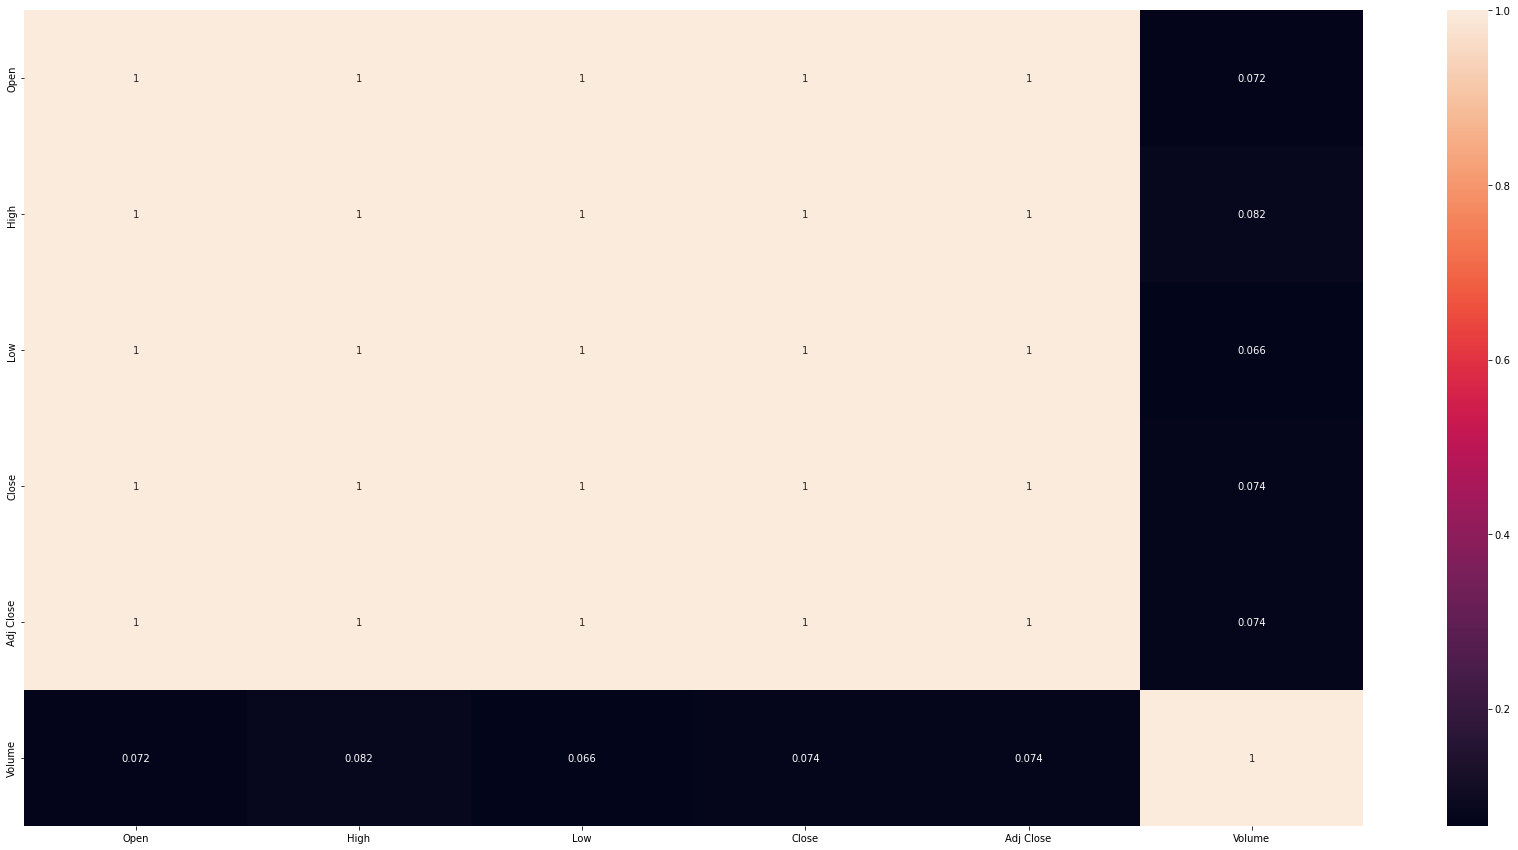

In [15]:
## Heat-map

plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(),annot=True)

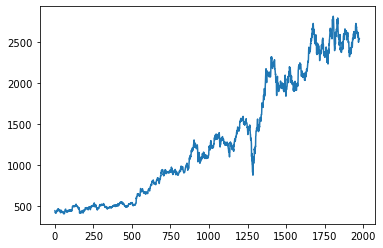

In [16]:
plt.plot(df.Close)

In [17]:
## Considering only `Close` variable.

close_df = df["Close"]
close_df

0        439.781311
1        438.617340
2        433.812897
3        414.124512
4        423.139069
           ...     
1971    2524.050049
1972    2544.699951
1973    2544.449951
1974    2543.300049
1975    2547.199951
Name: Close, Length: 1976, dtype: float64

### `Step-4:` Exploration and Analysis of Datasets.

In [18]:
close_df.size

1976

In [19]:
close_df.shape

(1976,)

In [20]:
close_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 1976 entries, 0 to 1975
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1976 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [21]:
close_df.describe()

count    1976.000000
mean     1314.889481
std       751.597730
min       401.568542
25%       531.945190
50%      1171.445862
75%      2034.700012
max      2819.850098
Name: Close, dtype: float64

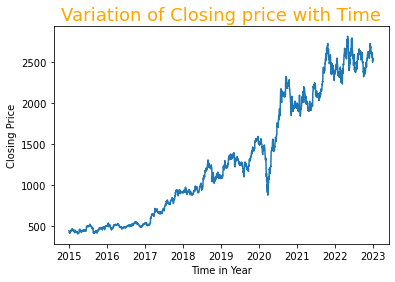

In [22]:
## Creating a plot Closing Price vs Date(Years)

plt.plot(df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

### `Step-5:` Preprocessing by MinMax Scaler.

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
close_df = minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.01580162],
       [0.0153203 ],
       [0.01333358],
       ...,
       [0.88611742],
       [0.88564191],
       [0.88725459]])

### `Step-6:` Preparing train and test datasets.

In [24]:
train_size = int(len(close_df)*0.8)
test_size = len(close_df) - train_size

train_data = close_df[:train_size, :] 
test_data = close_df[train_size:len(close_df), :1]

In [25]:
train_data.shape

(1580, 1)

In [26]:
test_data.shape

(396, 1)

In [27]:
def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [28]:
# Reshaping into tuples of the form with X=t, t+1,..t+99 and Y=t+100 for time_step=100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [29]:
X_train.shape

(1479, 100)

In [30]:
y_train.shape

(1479,)

In [31]:
X_test.shape

(295, 100)

In [32]:
 y_test.shape

(295,)

In [33]:
## Reshaping input into 3-Dimensional form required for LSTM.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### `Step-7:`  Constructing Stacked LSTM model.

In [34]:
# Constructing our stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1);

Epoch 1/100
24/24 [==============================] - 11s 190ms/step - loss: 0.0148 - val_loss: 0.0021
Epoch 2/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/100
24/24 [==============================] - 3s 118ms/step - loss: 9.0447e-04 - val_loss: 0.0032
Epoch 4/100
24/24 [==============================] - 3s 119ms/step - loss: 8.6435e-04 - val_loss: 0.0021
Epoch 5/100
24/24 [==============================] - 3s 121ms/step - loss: 8.3756e-04 - val_loss: 0.0023
Epoch 6/100
24/24 [==============================] - 3s 118ms/step - loss: 8.0795e-04 - val_loss: 0.0027
Epoch 7/100
24/24 [==============================] - 3s 120ms/step - loss: 8.4465e-04 - val_loss: 0.0018
Epoch 8/100
24/24 [==============================] - 3s 119ms/step - loss: 7.7293e-04 - val_loss: 0.0018
Epoch 9/100
24/24 [==============================] - 3s 118ms/step - loss: 7.6540e-04 - val_loss: 0.0019
Epoch 10/100
24/24 [==============================] - 3s 120ms

## `Step-8:` Evaluation of constructed LSTM Model.

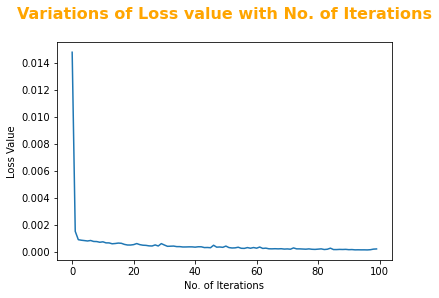

In [37]:
## Visualizing Loss Function.
## Ploting Loss of our trained model

loss = model.history.history['loss']
plt.plot(loss)
plt.xlabel("No. of Iterations")
plt.ylabel("Loss Value")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

 `Above graph shows that loss has been decreased significantly with the increase in iterations, `

`thus, model is well-trained.`

In [38]:
## Evaluation of our constructed model on train and test data.

train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

10/10 [==============================] - 0s 25ms/step


In [39]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_preds))

1204.902232818788

In [40]:
math.sqrt(mean_squared_error(y_test, test_preds))

2516.6885819346717

In [41]:
close_df

array([[0.01580162],
       [0.0153203 ],
       [0.01333358],
       ...,
       [0.88611742],
       [0.88564191],
       [0.88725459]])

In [42]:
train_preds.shape

(1479, 1)

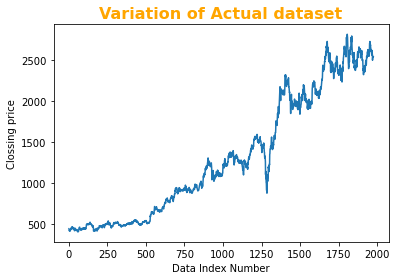

In [43]:
# shift train predictions for plotting
# to align predicted and actual on same curve

look_back=100  
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting

testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_df)-1, :] = test_preds

# plot baseline- Actual value of Closing price

plt.plot(minmax.inverse_transform(close_df))
plt.title("Variation of Actual dataset", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

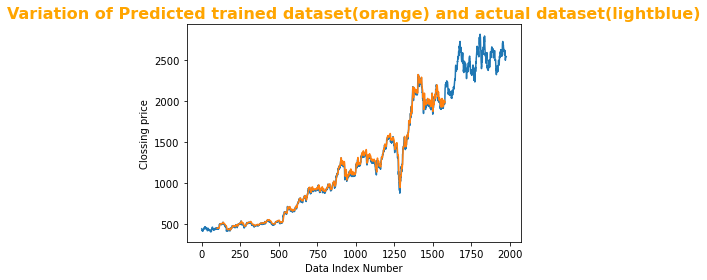

In [44]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

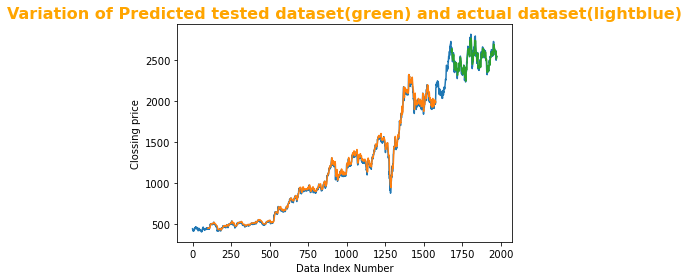

In [45]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price 
# vs Predictions on CLosing Price made by our model on test dataset

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted tested dataset(green) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");
plt.plot(testPredictPlot)
plt.show()

In [46]:
## Since, our model trained with first 100 data inputs and start predicting from 101 onwards..

## so orange starts from 101th data index number. Similar logic for test data...

## LightBlue = Actual Closing Price
## Orange  = Predictions on Closing Price made by our model on training dataset
## Green  = Predictions on CLosing Price made by our model on test dataset

 ### `Step-9:` Forecasting for future 30 days.

In [47]:
## length of test_data.

len(test_data)

396

In [48]:
test_data.shape

(396, 1)

In [49]:
### Considering last 100 days data for the future prediction...

In [50]:
preds_input = test_data[296:]
preds_input[:5]

array([[0.88179619],
       [0.89550423],
       [0.90185175],
       [0.90540804],
       [0.92273435]])

In [51]:
preds_input.shape

(100, 1)

In [52]:
# Reshaping into row matrix

preds_input = preds_input.reshape(1, -1)
preds_input.shape

(1, 100)

In [53]:
temp_input = list(preds_input)
len(temp_input)

1

In [54]:
len(temp_input)

1

In [55]:
type(temp_input)

list

In [56]:
preds_input.shape[1]

100

In [57]:
## Demonstrating prediction for next 30 days

Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) 
        preds_input=preds_input.reshape(1,-1)
    
    preds_input = preds_input.reshape((1, time_step,1))
    day_output = model.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())
    i=i+1
    
print(Thirty_days_output)

[[0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849], [0.8868581056594849]]


In [63]:
type(Latest_100_days_output), type(Thirty_days_output)

(numpy.ndarray, list)

In [65]:
Latest_100_days_output_list = Latest_100_days_output.tolist()
Latest_100_days_output_list.extend(Thirty_days_output)
print(len(Latest_100_days_output_list))

71


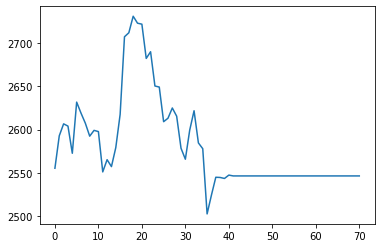

In [66]:
plt.plot(minmax.inverse_transform(Latest_100_days_output_list));